<a href="https://colab.research.google.com/github/Fazzaaaa/smartVision_and_imageProcessing/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PRAKTIKUM**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


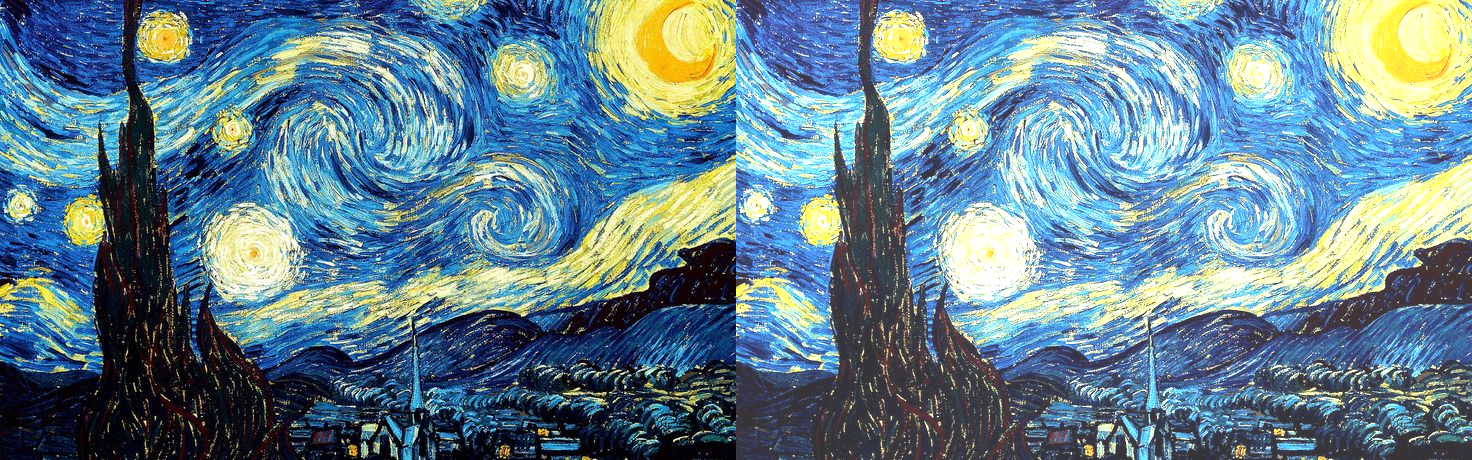

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

print('Mengubah tingkat kecerahan citra')
print('--------------------------------')

try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

# Load the image
original = cv.imread('/content/drive/MyDrive/Vangogh.jpeg')

# Check if image was successfully loaded
if original is None:
    print("Error: Image not found or cannot be opened.")
else:
    # Create an empty image with the same size and type
    brightness_image = np.zeros(original.shape, original.dtype)

    # Adjust the brightness
    for y in range(original.shape[0]):
        for x in range(original.shape[1]):
            for c in range(original.shape[2]):
                brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)

    # Concatenate original and brightness-adjusted images
    final_frame = cv.hconcat([original, brightness_image])
    cv2_imshow(final_frame)


## **TUGAS PRAKTIKUM**

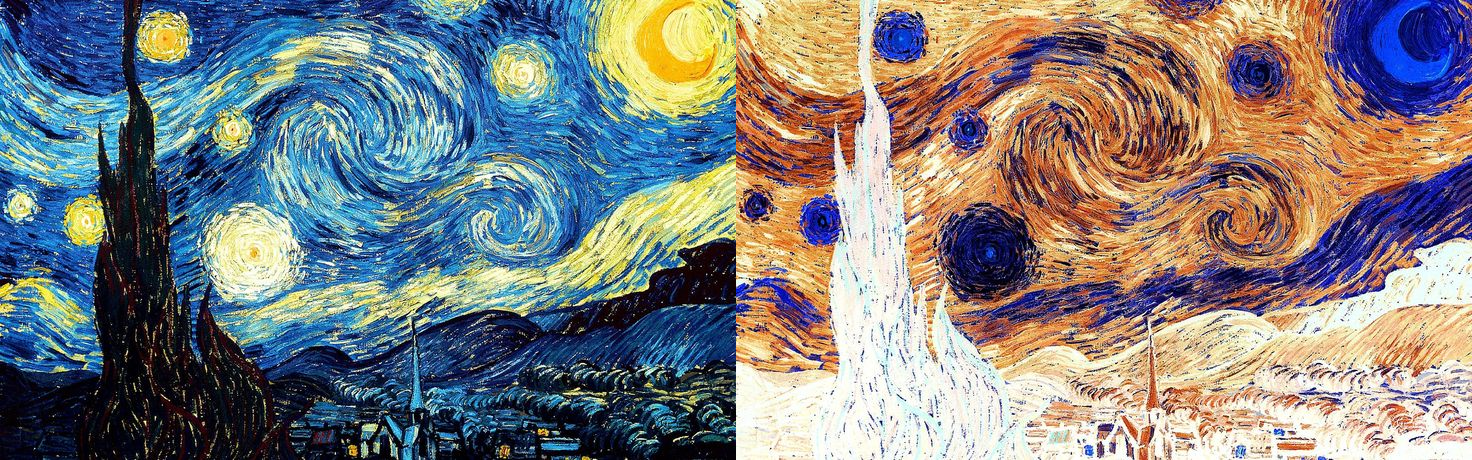

In [3]:
original = cv.imread('/content/drive/MyDrive/Vangogh.jpeg')
if original is None:
    print("Error: Image not found.")
else:
    inverted_image = 255 - original
    comparison_image = cv.hconcat([original, inverted_image])
    cv2_imshow(comparison_image)

Mengubah kontras dan tingkat kecerahan citra
---------------------------------
Masukkan tingkat kecerahan[-255 - 255]: 50
Masukkan kontras [1.0-3.0]: 2


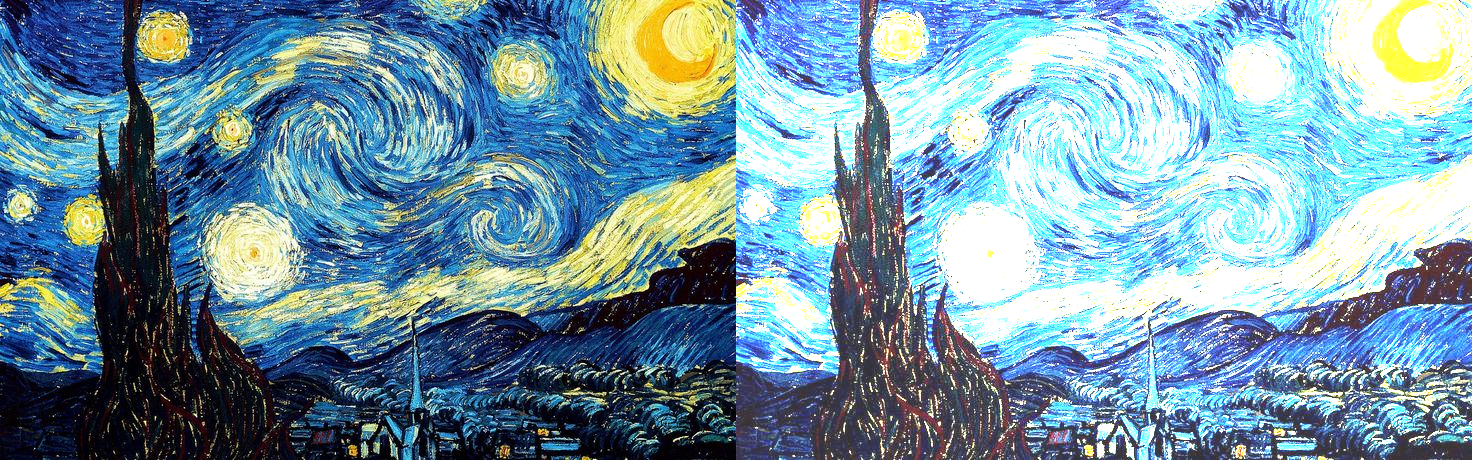

In [4]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('---------------------------------')

try:
    brightness = int(input('Masukkan tingkat kecerahan[-255 - 255]: '))
    contrast = float(input('Masukkan kontras [1.0-3.0]: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Vangogh.jpeg')

new_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            new_image[y, x, c] = np.clip(contrast * original[y, x, c] + brightness, 0, 255)

final_frame = cv.hconcat((original, new_image))

cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------
Masukkan nilai kecerahan: 50


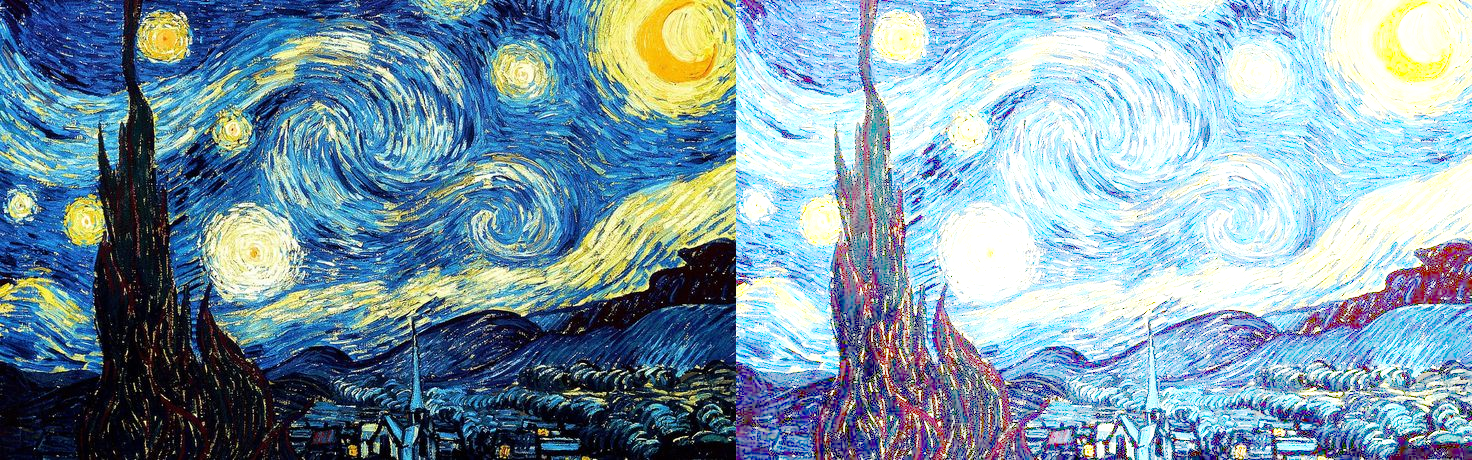

In [5]:
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------')

try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, input tidak valid')

original = cv.imread('/content/drive/MyDrive/Vangogh.jpeg')
if original is None:
    print('Error: Image not found')

brightness_image = np.zeros_like(original, dtype=np.uint8)

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y, x, c] = np.clip(brightness * (np.log(1.0 + original[y, x, c])), 0, 255)

final_frame = cv.hconcat([original, brightness_image])
cv2_imshow(final_frame)

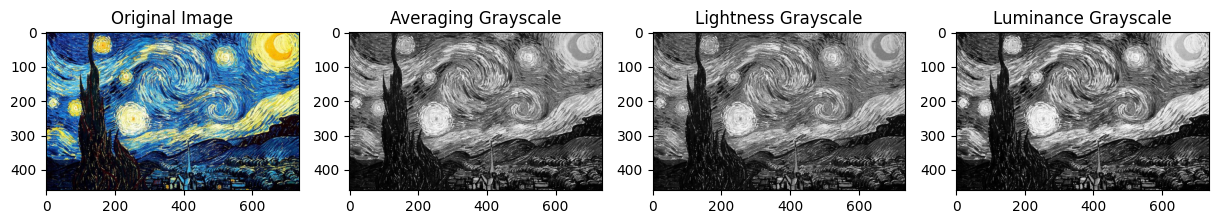

In [6]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Load the original image
original = cv.imread('/content/drive/MyDrive/Vangogh.jpeg')
image_rgb = cv.cvtColor(original, cv.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib

# Grayscale methods
averaging = np.mean(image_rgb, axis=2).astype(np.uint8)
lightness = np.mean([np.max(image_rgb, axis=2), np.min(image_rgb, axis=2)], axis=0).astype(np.uint8)
luminance = (0.299 * image_rgb[:, :, 0] + 0.587 * image_rgb[:, :, 1] + 0.114 * image_rgb[:, :, 2]).astype(np.uint8)

# Plotting
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 4, 1), plt.imshow(image_rgb), plt.title('Original Image'), plt.axis('on')

# Averaging
plt.subplot(1, 4, 2), plt.imshow(averaging, cmap='gray'), plt.title('Averaging Grayscale'), plt.axis('on')

# Lightness
plt.subplot(1, 4, 3), plt.imshow(lightness, cmap='gray'), plt.title('Lightness Grayscale'), plt.axis('on')

# Luminance
plt.subplot(1, 4, 4), plt.imshow(luminance, cmap='gray'), plt.title('Luminance Grayscale'), plt.axis('on')

plt.show()


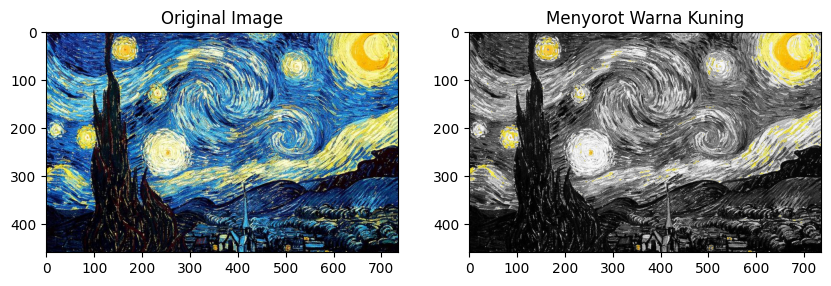

In [8]:
original = cv.imread('/content/drive/MyDrive/Vangogh.jpeg')
finimg = cv.cvtColor(original, cv.COLOR_BGR2RGB)
hsv = cv.cvtColor(original, cv.COLOR_BGR2HSV)

mask = cv.inRange(hsv, np.array([20, 100, 100]), np.array([30, 255, 255]))
mask3 = np.dstack([mask] * 3)

yellow_highlighted = cv.bitwise_and(finimg, mask3)
gray_background = cv.bitwise_and(cv.cvtColor(cv.cvtColor(finimg, cv.COLOR_RGB2GRAY), cv.COLOR_GRAY2RGB), cv.bitwise_not(mask3))

final_image = cv.add(gray_background, yellow_highlighted)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(finimg), plt.title('Original Image'), plt.axis('on')
plt.subplot(1, 2, 2), plt.imshow(final_image), plt.title('Menyorot Warna Kuning'), plt.axis('on')
plt.show()
